<a href="https://colab.research.google.com/github/baiascience/metricas_erro_forecast/blob/main/Forecast_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the same way electricity revolutionized the second half of the XIX century, allowing industries to produce more with less, AI will drastically impact the following decades.

Using data Science to solve a problem will require a scientific mindset more than codings skills. 

In the field of data science as well as for supply chain, simple questions do not come with simple answers. To answer these questions, you will need to both be a scientist and use the rights tools. We will discuss both. 

From negotiating contract volumes with suppliers to setting safety stock targets, everything relates to the ultimate question:

***What is tomorrow going to be like?***


# Chapter 1


## Idea

The moving average model is based on the idea that future demand is similar to the recent demanda we observed. With this model, we will simply assume that the forecast is the average of the demand during the last n periods. If you look at demmand on a monthy basis, this could translate as "We predict the demand in June to be the average of March, April e May. 

Model:

$ f_t =  \frac{1}{n} \sum_{i=1}^{n} d_{t-i} $


Where:

n is the number of periods we take the average of;

$d_t$ is the demand we observed during period t;

$f_t$ is the forecast we made for period t.


Initialization: 

The first forecast will be done for $t = n + 1$ because there will be historical period

Here we will have for simplification:


Demand will be noted as *d*

Forecast will noted as *f*

Insights:

The moving average forecast where n=1 is a rather specific case: the forecast is the demand with a one-period lag. This what we call a naive forecast: "tomorrow will be just as today". A naive forecast is interesting as it will react fast to a changing demand, but on the other hand it will also be sensitive to noise and outliers. 

*Noise* In statistics, the noise is an unexplained variation in the data. It is often due to the randomness of the different processes at hand. 

We have to make a *Trade-off* between reactivy and smoothness. 

You will see, we will have to make this trade-off over and over again for all the exponential smoothing models that we will see later. 

# Código as is on the book

In [ ]:
#my first model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def moving_average (d,extra_periods=1,n=3):
    #transform the input into a numpy array
    d = np.array(d)
    #Historical period length
    cols = len(d)
    #Append np.nan into the demand array to cover future periods
    d = np.append(d,[np.nan]*extra_periods)
    #Define the forecast array
    f = np.full(cols+extra_periods,np.nan)
    
    # Create all the t+1 forecasts until end of historical period
    for t in range(n, cols+1):
        f[t] = np.mean(d[t-n:t])
        
    #Forecast for all extra periods
    f[cols + 1:] = f[t]
    
    df = pd.DataFrame.from_dict({'Demand':d,'Forecast':f,'Error':d-f})
    return df

In [ ]:
d = [28,19,18,13,19,16,19,18,13,16,16,11,18,15,13,15,13,11,13,10,12]

In [ ]:
df = moving_average(d)

In [ ]:
df

,Demand,Forecast,Error
0,28.0,NaN,NaN
1,19.0,NaN,NaN
2,18.0,NaN,NaN
3,13.0,21.666667,-8.666667
4,19.0,16.666667,2.333333
5,16.0,16.666667,-0.666667
6,19.0,16.000000,3.000000
7,18.0,18.000000,0.000000
8,13.0,17.666667,-4.666667
9,16.0,16.666667,-0.666667


<AxesSubplot:title={'center':'Moving Average'}>

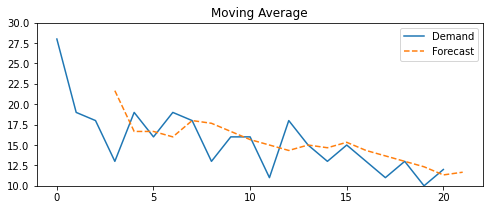

In [ ]:
df[['Demand','Forecast']].plot(figsize=(8,3),ylim=(10,30),style=['-','--'], title='Moving Average')

# Entendendo o código

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
extra_periods, n =1,3

In [ ]:
d = [28,19,18,13,19,16,19,18,13,16,16,11,18,15,13,15,13,11,13,10,12]

In [ ]:
d = np.array(d) 
#to make sure that the function works even if d is passed as a pandas DataFrame or a simple list.

In [ ]:
d

array([28, 19, 18, 13, 19, 16, 19, 18, 13, 16, 16, 11, 18, 15, 13, 15, 13,
       11, 13, 10, 12])

In [ ]:
cols = len(d)

In [ ]:
d = np.append(d,[np.nan]*extra_periods)

In [ ]:
d

array([28., 19., 18., 13., 19., 16., 19., 18., 13., 16., 16., 11., 18.,
       15., 13., 15., 13., 11., 13., 10., 12., nan, nan])

In [ ]:
len(d)

23

In [ ]:
f = np.full(cols + extra_periods, np.nan)

In [ ]:
f

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
len(f)

23

In [ ]:
d

array([28., 19., 18., 13., 19., 16., 19., 18., 13., 16., 16., 11., 18.,
       15., 13., 15., 13., 11., 13., 10., 12., nan, nan])

In [ ]:
for t in range(n,cols+1):
    
    f[t] = np.mean(d[t-n:t],) #d[t] está sempre olhando para o passado, f[t] está no máximo atual.
    #observe que usa-se d[t-3] até d[t-1] para prever f[t]. Lembre-se que t não entra no slice de d.
    print(f'Moment t:{t}, for period n {n}, using the following demand: {d[t-n:t]} is {f[t]}')
    """
    Para o primeiro mês:  d[0] até d[2] (slice não inclui 3) para prever f[3]
    Para o segundo mês: d[1] até d[3] (slice não inclui 4) para prever f[4]
    """
    

Moment t:3, for period n 3, using the following demand: [28. 19. 18.] is 21.666666666666668
Moment t:4, for period n 3, using the following demand: [19. 18. 13.] is 16.666666666666668
Moment t:5, for period n 3, using the following demand: [18. 13. 19.] is 16.666666666666668
Moment t:6, for period n 3, using the following demand: [13. 19. 16.] is 16.0
Moment t:7, for period n 3, using the following demand: [19. 16. 19.] is 18.0
Moment t:8, for period n 3, using the following demand: [16. 19. 18.] is 17.666666666666668
Moment t:9, for period n 3, using the following demand: [19. 18. 13.] is 16.666666666666668
Moment t:10, for period n 3, using the following demand: [18. 13. 16.] is 15.666666666666666
Moment t:11, for period n 3, using the following demand: [13. 16. 16.] is 15.0
Moment t:12, for period n 3, using the following demand: [16. 16. 11.] is 14.333333333333334
Moment t:13, for period n 3, using the following demand: [16. 11. 18.] is 15.0
Moment t:14, for period n 3, using the f

In [ ]:
t

22

In [ ]:
f

array([        nan,         nan,         nan, 21.66666667, 16.66666667,
       16.66666667, 16.        , 18.        , 17.66666667, 16.66666667,
       15.66666667, 15.        , 14.33333333, 15.        , 14.66666667,
       15.33333333, 14.33333333, 13.66666667, 13.        , 12.33333333,
       11.33333333, 11.66666667,         nan])

In [ ]:
f[cols:] = f[t-1] #todos o meses após o primeiro np.nan serão igualados ao último forecast feito.

In [ ]:
f[22]

11.666666666666666

In [ ]:
f

array([        nan,         nan,         nan, 21.66666667, 16.66666667,
       16.66666667, 16.        , 18.        , 17.66666667, 16.66666667,
       15.66666667, 15.        , 14.33333333, 15.        , 14.66666667,
       15.33333333, 14.33333333, 13.66666667, 13.        , 12.33333333,
       11.33333333, 11.66666667, 11.66666667])

In [ ]:
df= pd.DataFrame({'Demand':d,'Forecast':f})

In [ ]:
df

,Demand,Forecast
0,28.0,NaN
1,19.0,NaN
2,18.0,NaN
3,13.0,21.666667
4,19.0,16.666667
5,16.0,16.666667
6,19.0,16.000000
7,18.0,18.000000
8,13.0,17.666667
9,16.0,16.666667


<AxesSubplot:title={'center':'Moving Average Example'}, xlabel='Periods'>

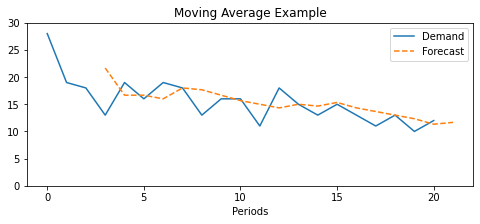

In [ ]:
df[['Demand','Forecast']].plot(figsize=(8,3),ylim=(0,30),style=['-','--'], title='Moving Average Example')

By default, `.plot()` will use the **DataFrame index** as the x axis. Therefore, if you want to display a legend on the x axis, you simply can name the **DataFrame index**

In [ ]:
df.index.name = 'Periods' 

array([[<AxesSubplot:xlabel='Periods'>, <AxesSubplot:xlabel='Periods'>]],
      dtype=object)

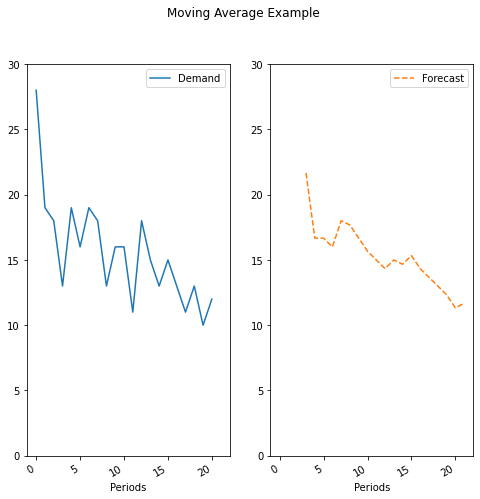

In [ ]:
df[['Demand','Forecast']].plot(subplots=True,layout=(1,2),figsize=(8,8),ylim=(0,30),style=['-','--'], title='Moving Average Example')

# Exercício

Faça um forecast de uma serie com baseada em random normal. Com n=5 números de períodos na média e 2 extra_periods. Plote o gráfico de demanda e forecast. 

In [ ]:
array_qualquer = np.full(10,2)

In [ ]:
array_qualquer

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
array_qualquer2 = np.full((10,10),3)

In [ ]:
array_qualquer2

array([[3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])